# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_keys
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


### Generate the Cities List by Using the `citipy` Library

In [94]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [95]:
# Create base URL for open weather map API call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_keys

name_city = []
clouds = []
countries = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

# Create record counter initialized at 1.
record = 1

# Print statement for log.
print("Beginning Data Retrieval")
print('-'*25)

# Loop through all cities in cities list.
for city in cities:
    
    # Try statement to append calls where values are found.
    try:
        response = requests.get(f'{base_url}&q={city}').json()
        name_city.append(response['name'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        
        print(f'Processing Record {record} | {city}')
        
        # Increase record counter.
        record += 1
        
        # Do not exceed API call limit.
        time.sleep(1.01)
        
    # If no record found for city, then skip.
    except:
        print('City not found. Skipping...')
    continue


Beginning Data Retrieval
-------------------------
Processing Record 1 | halifax
Processing Record 2 | grytviken
Processing Record 3 | bati
Processing Record 4 | nahiyat ash shinafiyah
Processing Record 5 | ushuaia
Processing Record 6 | albany
Processing Record 7 | kingscliff
Processing Record 8 | sarangani
Processing Record 9 | quellon
Processing Record 10 | constantia
Processing Record 11 | port-aux-francais
Processing Record 12 | jayapura
Processing Record 13 | aquiraz
Processing Record 14 | isafjordur
Processing Record 15 | port lincoln
Processing Record 16 | soalkuchi
Processing Record 17 | thompson
Processing Record 18 | namibe
Processing Record 19 | diego de almagro
Processing Record 20 | bredasdorp
Processing Record 21 | hilo
Processing Record 22 | waitangi
Processing Record 23 | invercargill
Processing Record 24 | bonthe
Processing Record 25 | laguna
Processing Record 26 | tara
Processing Record 27 | teguise
Processing Record 28 | la ronge
Processing Record 29 | berdigestyakh


Processing Record 236 | ashburton
Processing Record 237 | dhankuta
Processing Record 238 | port douglas
Processing Record 239 | sandpoint
Processing Record 240 | port saint john's
Processing Record 241 | gunjur
Processing Record 242 | lorengau
Processing Record 243 | ponta delgada
Processing Record 244 | sisimiut
Processing Record 245 | notodden
Processing Record 246 | pathein
Processing Record 247 | atafu village
Processing Record 248 | hadibu
Processing Record 249 | youssoufia
Processing Record 250 | la concordia
Processing Record 251 | kupang
Processing Record 252 | santiago de cao
Processing Record 253 | carnarvon
Processing Record 254 | balaipungut
Processing Record 255 | rosarito
Processing Record 256 | karungdong
Processing Record 257 | sarkand
Processing Record 258 | tura
Processing Record 259 | revelstoke
Processing Record 260 | nar'yan-mar
Processing Record 261 | tulun
Processing Record 262 | pennagaram
Processing Record 263 | cortland
Processing Record 264 | thayetmyo
Proces

Processing Record 468 | raja
Processing Record 469 | dryden
Processing Record 470 | ta`u
Processing Record 471 | shchastya
City not found. Skipping...
Processing Record 472 | i-n-salah
City not found. Skipping...
Processing Record 473 | holualoa
Processing Record 474 | baotou
Processing Record 475 | boguchany
Processing Record 476 | severoural'sk
Processing Record 477 | lashkar gah
Processing Record 478 | constitucion
Processing Record 479 | mazagao
Processing Record 480 | balqash
Processing Record 481 | maxixe
Processing Record 482 | lae
Processing Record 483 | ioannina
Processing Record 484 | vilyuysk
Processing Record 485 | tayu
Processing Record 486 | raduzhny
Processing Record 487 | antsohihy
Processing Record 488 | corner brook
Processing Record 489 | paranavai
Processing Record 490 | nouadhibou
Processing Record 491 | erenhot
Processing Record 492 | nigde
Processing Record 493 | kalianget
Processing Record 494 | tshabong
Processing Record 495 | tangalle
Processing Record 496 | c

In [96]:
# Create values dictionary from API call lists.
weatherdata = {
    'City': name_city,
    'Cloudiness': clouds,
    'Country': countries,
    'Date': dates,
    'Humidity': humidities,
    'Lat': lats,
    'Lng': lngs,
    'Max Temperature': max_temps,
    'Wind Speed': wind_speeds
}

# Create new DF for values in dictionary.
df_weather = pd.DataFrame(weatherdata)

# Display count of weather values per column.
df_weather.count()


City               580
Cloudiness         580
Country            580
Date               580
Humidity           580
Lat                580
Lng                580
Max Temperature    580
Wind Speed         580
dtype: int64

In [97]:
# Display sample data
df_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Halifax,47,CA,1683414038,42,44.6453,-63.5724,11.00,7.20
1,Grytviken,98,GS,1683414215,85,-54.2811,-36.5092,3.44,5.33
2,Batī,100,ET,1683414216,68,11.1833,40.0167,19.42,1.61
3,Nāḩiyat ash Shināfīyah,14,IQ,1683414217,8,31.5874,44.6602,28.39,4.90
4,Ushuaia,20,AR,1683414218,65,-54.8000,-68.3000,5.81,1.03


In [98]:
# Export the City_Data into a csv
df_weather.to_csv("../output_data/cities.csv", index_label="City_ID")

In [99]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
City_ID,,,,,,,,,
0,Halifax,47,CA,1683414038,42,44.6453,-63.5724,11.00,7.20
1,Grytviken,98,GS,1683414215,85,-54.2811,-36.5092,3.44,5.33
2,Batī,100,ET,1683414216,68,11.1833,40.0167,19.42,1.61
3,Nāḩiyat ash Shināfīyah,14,IQ,1683414217,8,31.5874,44.6602,28.39,4.90
4,Ushuaia,20,AR,1683414218,65,-54.8000,-68.3000,5.81,1.03


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

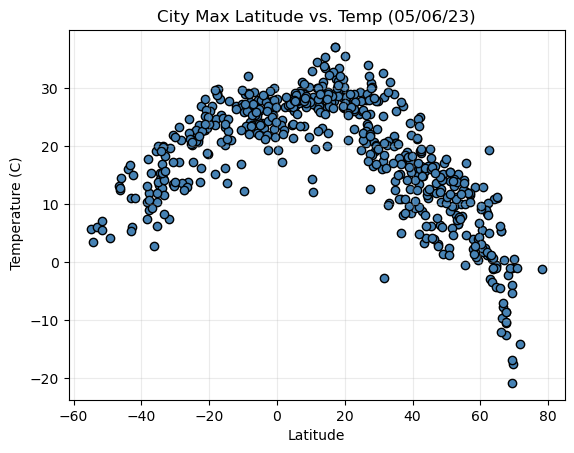

In [100]:
# create scatter plot for lat vs. max temp
plt.scatter(city_data_df["Lat"], city_data_df["Max Temperature"], facecolor="steelblue", edgecolor="black")

# title, axes, and gridlines
plt.title("City Max Latitude vs. Temp (05/06/23)")
plt.xlabel("Latitude")
plt.ylabel(" Temperature (C)")
plt.grid(alpha=0.25)

# save png
plt.savefig("../output_data/Fig1.png")

#### Latitude Vs. Humidity

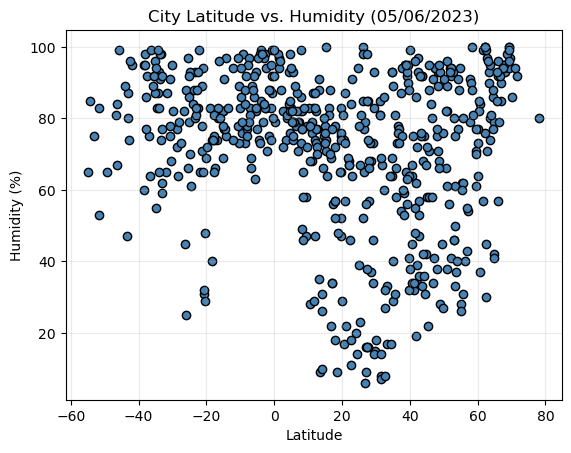

In [101]:
# create scatter plot for lat vs. max temp
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")

# title, axes, and gridlines
plt.title("City Latitude vs. Humidity (05/06/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=0.25)

# save png
plt.savefig("../output_data/Fig2.png")

#### Latitude Vs. Cloudiness

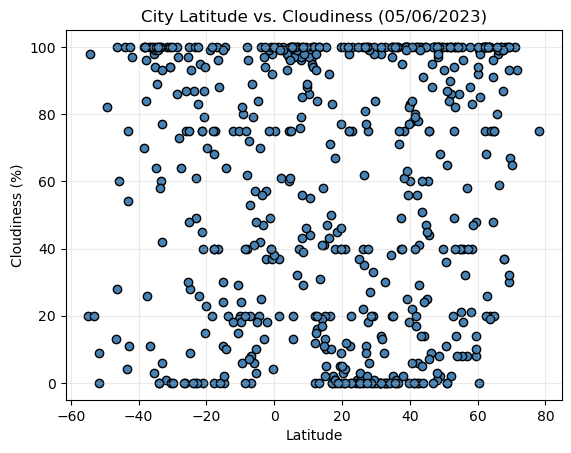

In [102]:
# create scatter plot for lat vs. max temp
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# title, axes, and gridlines
plt.title("City Latitude vs. Cloudiness (05/06/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=0.25)

# save png
plt.savefig("../output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

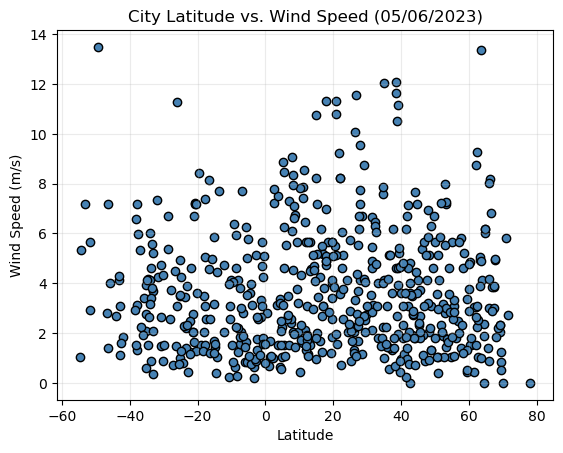

In [103]:
# create scatter plot for lat vs. max temp
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black")

# title, axes, and gridlines
plt.title("City Latitude vs. Wind Speed (05/06/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(alpha=0.25)

# save png
plt.savefig("../output_data/Fig4.png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
 northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

In [59]:
northern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
City_ID,,,,,,,,,
0,Colares,20,PT,1683405848,82,38.7992,-9.4469,18.82,5.81
2,Wamba,52,NG,1683405850,70,8.9333,8.6000,25.77,0.93
3,Iqaluit,20,CA,1683405812,74,63.7506,-68.5145,-0.15,13.38
4,Qaqortoq,81,GL,1683405852,79,60.7167,-46.0333,2.81,1.81
5,Bethel,0,US,1683405853,37,41.3712,-73.4140,22.79,4.63


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
City_ID,,,,,,,,,
1,Adamstown,100,PN,1683405812,78,-25.0660,-130.1015,22.38,3.88
11,Waitangi,100,NZ,1683405812,93,-43.9535,-176.5597,14.90,1.34
14,Port-aux-Français,77,TF,1683405863,60,-49.3500,70.2167,4.36,13.22
22,Coyhaique,20,CL,1683405872,50,-45.5752,-72.0662,14.34,2.06
23,Grytviken,100,GS,1683405812,80,-54.2811,-36.5092,4.16,7.33


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8243990622131856


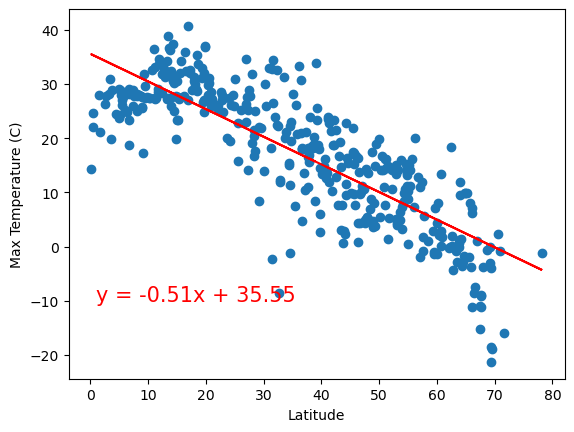

In [64]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression: 
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
#plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
#print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/north_temp_lg.png")
plt.show()

The p-value is: 2.856486169327979e-40
The r-value is: 0.8002514606679422


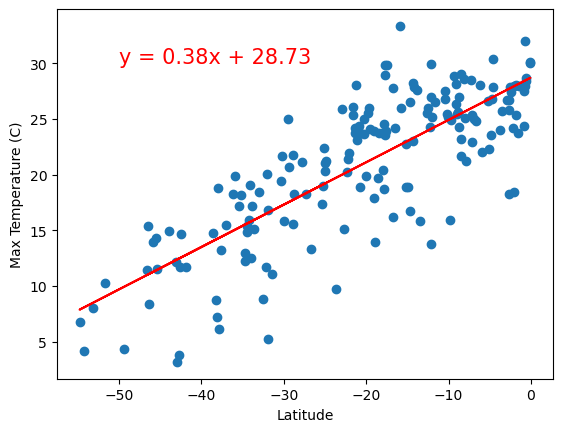

In [73]:
# south Hemisphere - Max Temp vs. Latitude Linear Regression: 
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: southern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
#plt.title('southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
#print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/south_temp_lg.png")
plt.show()

**Discussion about the linear relationship:** The linear regression is showing what happens to temps as latitudes increase in the northern and southern hemispheres.This means that for the northern hemisphere as latitude increases you move further away from the equator,and in the southern hemisphere latitudes decrease when we move away from the equator. For the northern hemisphere there is a negative correlation between latitude and max temp.In the southern hemisphere there is a positive correlation between latitude and max temp.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11609154874041627


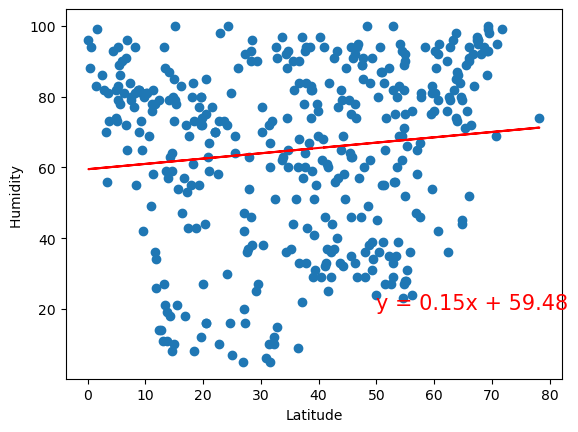

In [90]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 3: Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity ')


# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
#print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/north_humidity_lg.png")
plt.show()

The r-value is: 0.05954509975679988


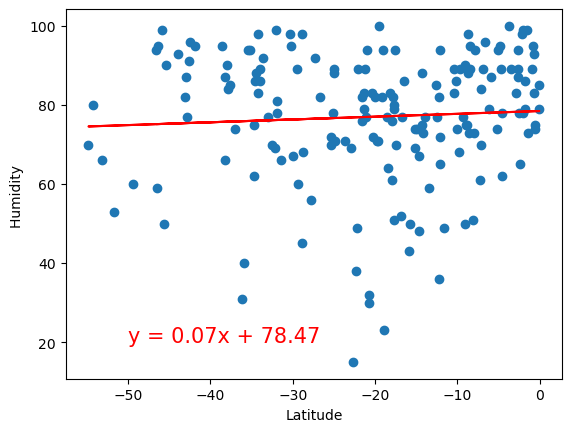

In [89]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 4: Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity ')


# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
#print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/south_humidity_lg.png")
plt.show()

**Discussion about the linear relationship:** The linear regression is showing what happens to humidity as latitude increases in the northern and southern hemispheres.The latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.010495385812474152


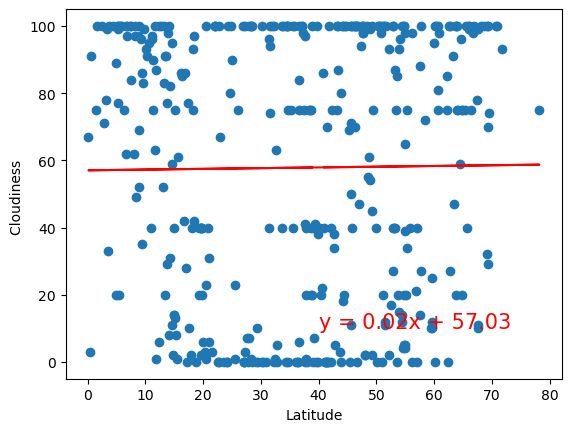

In [91]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 5: Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness ')


# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
#print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/north_cloud_lg.png")
plt.show()

The r-value is: -0.0654623888745764


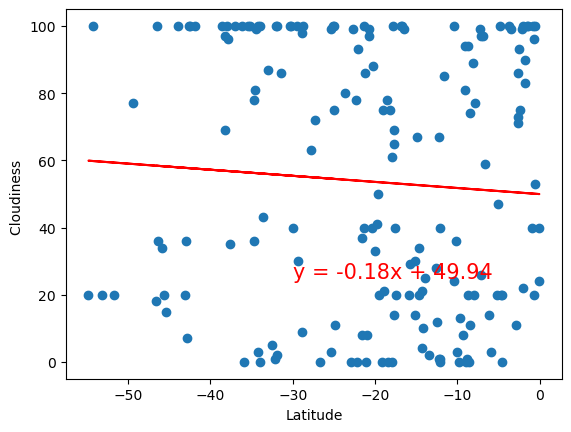

In [92]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression:
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 6: Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness ')


# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
#print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/south_cloud_lg.png")
plt.show()

**Discussion about the linear relationship:** The linear regression is showing what happens to cloudiness when latitudes increase in the northern and southern hemispheres.latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. For the northern hemisphere, increases in latitude appear to be weakly related to increases in cloudiness, but there is a positive correlation. However there is no correlation between latitude and cloudiness in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The p-value is: 0.02082345700264187
The r-value is: -0.11611462469390972


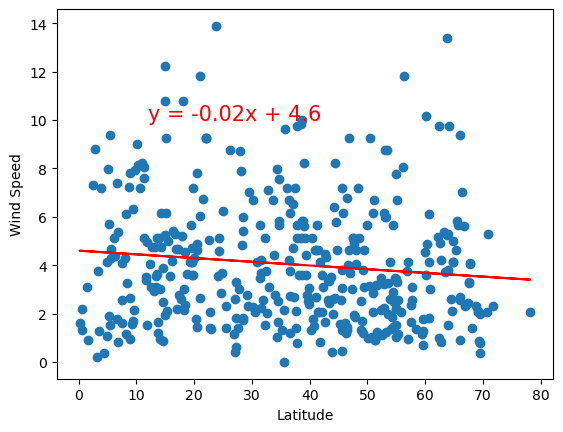

In [88]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression:
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 7: Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
#print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/north_wind_lg.png")
plt.show()

The p-value is: 0.0020796225590754345
The r-value is: -0.2312168893788363


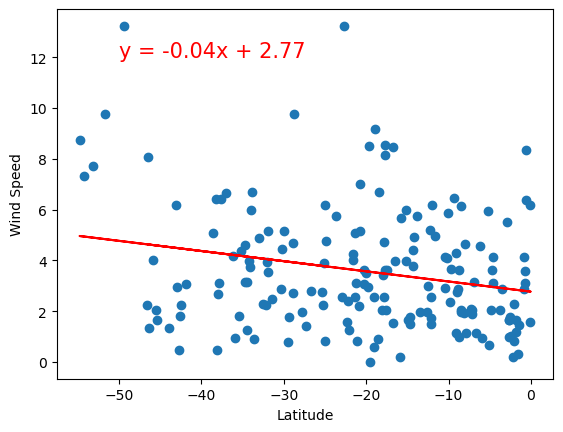

In [87]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression: 
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 8: Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
#print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("Images/south_wind_lg.png")
plt.show()

**Discussion about the linear relationship:** The linear regression is showing what happens to wind speed as latitudes increase in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. In the northern hemisphere, although the correlation between increasing latitude and wind speed is significant there only appears to be a weak correlation. On the other hand, in the southern hemisphere there is no correlation between the increasing latitude and wind speed